<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    ) # keep random state so we get the same values

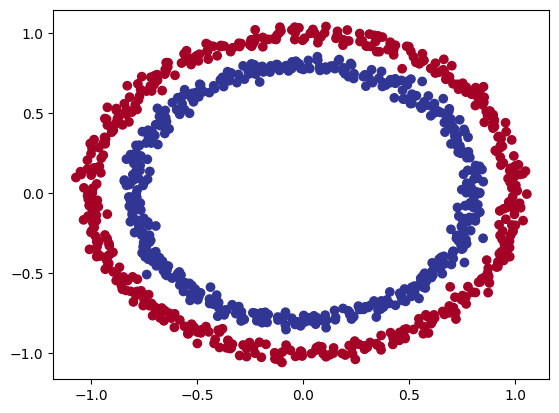

In [2]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [3]:
# prompt: turn X and y into torch.tensor format and split them into train and test

import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
# Replicate CircleModelV0 with nn.Sequential
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = nn.Sequential(

    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2578, -0.0154],
                      [-0.0452,  0.0086],
                      [ 0.2250,  0.2170],
                      [ 0.4053,  0.6663],
                      [ 0.2793,  0.4872]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.4986,  0.3451,  0.6872,  0.4210, -0.2919], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3508, -0.0175, -0.2988, -0.2566,  0.0834]], device='cuda:0')),
             ('1.bias', tensor([-0.0265], device='cuda:0'))])

In [5]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1060, -0.4723],
                      [ 0.3191, -0.2368],
                      [-0.3313,  0.0118],
                      [ 0.3585,  0.2677],
                      [ 0.5962, -0.5796]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3077, -0.0771, -0.5653, -0.1266,  0.2897], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0391,  0.0122,  0.0329,  0.2034,  0.3977]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.0022], device='cuda:0'))])

In [6]:
# the digital playground thing for neural network is amaizing:)

In [7]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.1)

In [8]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [9]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1071],
        [ 0.0737],
        [-0.3063],
        [-0.1921],
        [-0.0104]], device='cuda:0', grad_fn=<SliceBackward0>)

In [10]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5268],
        [0.5184],
        [0.4240],
        [0.4521],
        [0.4974]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [11]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)